**Loading packages**

In [1]:
from sklearn import svm
from sklearn.metrics import accuracy_score 
import numpy as np

import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn import tree, ensemble

from pygame import mixer # type: ignore

import pandas as pd
import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

pygame 2.6.0 (SDL 2.28.4, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def convert_sample(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.resize(image,[32,32]).numpy()
    image = image.reshape(1,-1)
    return image

**Loading data**

In [3]:
X = np.load('data/Xtrain.npy')
X = np.vstack(list(map(convert_sample, X)))
X = StandardScaler(with_mean=False, with_std=True).fit_transform(X)
print(f'Shape of training data features (observations,features): {X}')

y = np.load('data/ytrain.npy')
y = y.reshape(-1,)
print(f'Shape of training data labels (observations,): {y}')

Shape of training data features (observations,features): [[0.9664727  0.73401105 2.1236243  ... 3.5363805  3.5531092  1.2205696 ]
 [3.006804   3.0889633  3.4008765  ... 3.155305   3.170231   2.8683386 ]
 [3.3596432  3.3336337  3.3700993  ... 2.2407238  2.190063   2.1817682 ]
 ...
 [1.4266977  3.0430875  0.49243462 ... 1.2041985  2.9558194  1.0985126 ]
 [3.083508   3.3336337  3.5701509  ... 3.185791   2.190063   3.2802808 ]
 [3.451688   3.440677   3.462431   ... 3.4601655  3.4612184  3.4481094 ]]
Shape of training data labels (observations,): [0 1 1 ... 0 1 0]


In [6]:
print(X[:10])
print(y[:10])

[[0.9664727  0.73401105 2.1236243  ... 3.5363805  3.5531092  1.2205696 ]
 [3.006804   3.0889633  3.4008765  ... 3.155305   3.170231   2.8683386 ]
 [3.3596432  3.3336337  3.3700993  ... 2.2407238  2.190063   2.1817682 ]
 ...
 [1.0278361  1.7126925  2.7391675  ... 1.2041985  1.0414286  2.8530815 ]
 [0.6596559  2.98192    0.7232633  ... 1.5243019  2.572941   2.7310245 ]
 [1.303971   2.4314117  2.16979    ... 2.0273216  3.5837395  1.1290269 ]]
[0 1 1 0 0 0 0 0 0 1]


: 

**Fitting the model**

In [ ]:
model = ensemble.GradientBoostingClassifier( 
                                 criterion="squared_error", 
                                 learning_rate=0.05, 
                                 max_depth=2,
                                 n_estimators= 500
                                 )

print(f"Evaluating ...\n")
        
        # Fit the model
model.fit(X, y)
print(f"Fitting ...\n")

**Feature importance**

In [ ]:
data= pd.DataFrame(X)
data

In [ ]:
importances = model.feature_importances_
names = range(1024)

feature_importance = pd.DataFrame(zip(names, importances), columns=['Feature', 'Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index()
feature_importance_sorted = feature_importance.loc[feature_importance['Importance']>0.000]
feature_importance_sorted

**Plotting pixels** and inspecting importance

In [ ]:
import matplotlib.pyplot as plt
image_height = 32
image_width = 32
pixel_index = 225

row = pixel_index // image_width
col = pixel_index % image_width

print(f"Pixel at index {pixel_index} is located at row {row}, column {col} in the 2D image.")

plt.ylim(0,32)
plt.xlim(0,32)
for feature in feature_importance_sorted['Feature']:
    pixel_index = feature
    row = pixel_index // image_width
    col = pixel_index % image_width
    plt.plot(col, row, 'o')

In [ ]:
plt.ylim(0,0.025)
plt.xlim(0,1032)
plt.plot(feature_importance_sorted['Feature'], feature_importance_sorted['Importance'])

**Inspecting image**

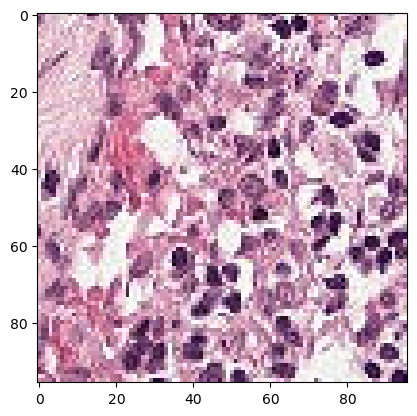

In [4]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
x=[5]
#loading data without reshaping
X = np.load('data/Xtrain.npy')
for a in x:
    plt.imshow(X[a])